# Lesson 12.3 逻辑回归建模

In [1]:
# 随机模块
import random

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# numpy
import numpy as np

# pytorch
import torch
from torch import nn,optim
import torch.nn.functional as F
from torch.utils.data import Dataset,TensorDataset,DataLoader
from torch.utils.tensorboard import SummaryWriter

# 自定义模块
from torchLearning import *

# 导入以下包从而使得可以在jupyter中的一个cell输出多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

c:\Users\HP\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\HP\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\HP\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [1]:
import torch

c:\Users\HP\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\HP\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\HP\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 一、逻辑回归的手动实现

&emsp;&emsp;接下来，尝试手动实现二分类逻辑回归，还是根据此前介绍的深度学习建模流程进行手动实现。

![32](https://i.loli.net/2021/02/05/SlouvnpBxmJYZ4c.jpg)

### 1.生成数据集



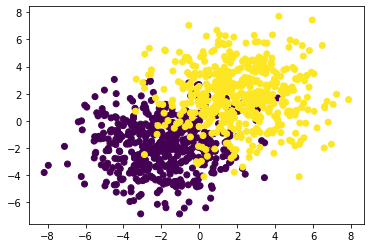

In [2]:
#————————————————————————————利用tensorGenCla————————————————————————————
torch.manual_seed(420)

# 创建数据
features, labels = tensorGenCla(num_class=2,bias=True)

# 可视化展示
plt.scatter(features[:,0],features[:,1],c=labels)

In [3]:
features

tensor([[-2.0141, -0.9911,  1.0000],
        [-0.6593, -2.7657,  1.0000],
        [-1.9395, -1.2347,  1.0000],
        ...,
        [ 2.9623,  2.0861,  1.0000],
        [ 0.4535, -0.2140,  1.0000],
        [-2.6681,  3.3935,  1.0000]])

### 2.建模过程



- Stage1.模型选择

针对二分类问题（0-1问题），我们可以简单的输出一个结果，作为标签取值为1的概率，因此模型结构如下

<img src="https://i.loli.net/2021/02/06/GkHcolMRt7QJE4e.jpg" alt="47" style="zoom:30%;" />

- 应该是-z

In [4]:
#————————————————————————————激活函数————————————————————————————
def sigmoid(z):
    return 1/(1+torch.exp(-z))

In [6]:
#————————————————————————————逻辑回归模型————————————————————————————
def logistic(X,w):
    return sigmoid(torch.mm(X,w))

In [7]:
#————————————————————————————辅助函数转换为二分类————————————————————————————
def cal(sigma,p=0.5):
    return((sigma >= p).float())

In [9]:
a = torch.randint(10,(5,))
a

tensor([0, 3, 4, 3, 6])

In [10]:
(a >= 5).float()

tensor([0., 0., 0., 0., 1.])

In [20]:
#————————————————————————————对二分类数据定义准确率————————————————————————————
def accuracy(sigma,y):
    acc_bool = cal(sigma).flatten() == y.flatten()
    acc = torch.mean(acc_bool.float())
    return(acc)

# 对布尔张量转换为浮点型计算均值,True=1,Flase=0
# flatten 拉平
# 

In [11]:
p = torch.tensor([1, 1, 2]) == torch.tensor([1, 2, 2])
p

tensor([ True, False,  True])

In [12]:
p.float()
torch.mean(p.float())

tensor([1., 0., 1.])

tensor(0.6667)

- Stage2.定义损失函数
  - y.numel() 返回总共有多少条数据

In [13]:
def cross_entropy(sigma,y):
    return(-1/y.numel()*torch.sum((1-y)*torch.log(1-sigma)+y*torch.log(sigma)))

- Stage3.定义优化方法

In [15]:
def sgd(params,lr):
    params.data  -= lr * params.grad
    params.grad.zero_()

- Stage4.训练模型

In [16]:
features

tensor([[-2.0141, -0.9911,  1.0000],
        [-0.6593, -2.7657,  1.0000],
        [-1.9395, -1.2347,  1.0000],
        ...,
        [ 2.9623,  2.0861,  1.0000],
        [ 0.4535, -0.2140,  1.0000],
        [-2.6681,  3.3935,  1.0000]])

In [21]:

torch.manual_seed(420)

# 设置核心参数
batch_size = 10
lr = 0.03
num_epochs = 3
# 2个特征且需要截距项，故w中包含3个系数
w = torch.ones(3,1,requires_grad=True)

# 参与训练的模型方程
net = logistic
loss = cross_entropy

# 训练过程
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w),y)
        l.backward()
        sgd(w,lr)
    train_acc = accuracy(net(features,w),labels)
    print('epoch %d, accuracy %f' % (epoch + 1, train_acc))

epoch 1, accuracy 0.905000
epoch 2, accuracy 0.906000
epoch 3, accuracy 0.914000


In [22]:
w

tensor([[1.0205],
        [0.9552],
        [0.5792]], requires_grad=True)

### 3.模型调试

根据上述迭代三轮返回的准确率，能够看出整体还在增加，让我们再多迭代几轮查看结果

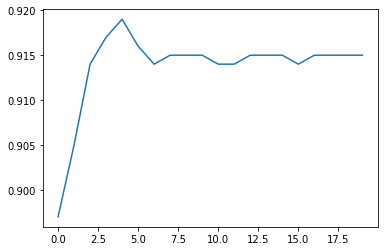

In [23]:
# 设置随机数种子
torch.manual_seed(420)   

# 迭代轮数
num_epochs = 20

# 设置初始权重
# 设置成0容易出现维度坍塌
w = torch.ones(3, 1, requires_grad = True)    

# 设置列表容器
train_acc = []

# 执行迭代
for i in range(num_epochs):
    for epoch in range(i):
        for X, y in data_iter(batch_size, features, labels):
            l = loss(net(X, w), y)
            l.backward()
            sgd(w, lr)
    train_acc.append(accuracy(net(features, w), labels))
    
# 绘制图像查看准确率变化情况
plt.plot(list(range(num_epochs)), train_acc)

能够看出，增加迭代次数之后，损失函数逼近最小值点，每次迭代梯度取值较小，整体准确率趋于

In [24]:
tensorGenCla?

Signature:
tensorGenCla(
    num_examples=500,
    num_inputs=2,
    num_class=3,
    deg_dispersion=[4, 2],
    bias=False,
)
Docstring:
分类数据集创建函数。

:param num_examples: 每个类别的数据数量
:param num_inputs: 数据集特征数量
:param num_class：数据集标签类别总数
:param deg_dispersion：数据分布离散程度参数，需要输入一个列表，其中第一个参数表示每个类别数组均值的参考、第二个参数表示随机数组标准差。
:param bias：建立模型逻辑回归模型时是否带入截距
:return: 生成的特征张量和标签张量，其中特征张量是浮点型二维数组，标签张量是长正型二维数组。
File:      g:\python学习资料2022年\codetest\pytorch&深度学习\note_pytorch\note_pytorch\torchlearning.py
Type:      function


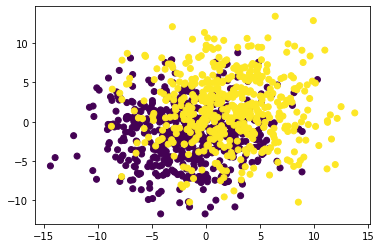

In [25]:
#————————————————————————————增加离散程度deg_dispersion————————————————————————————

torch.manual_seed(420)   

# 增加了标准差
features, labels = tensorGenCla(num_class=2, bias=True, deg_dispersion=[4, 4])

# 可视化展示
plt.scatter(features[:, 0], features[:, 1], c = labels)

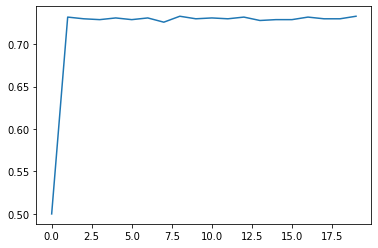

In [26]:
#————————————————————————————分类————————————————————————————
# 设置随机数种子
torch.manual_seed(420)   

# 迭代轮数
num_epochs = 20

# 设置初始权重
w = torch.zeros(3, 1, requires_grad = True)    

# 设置列表容器
train_acc = []

# 执行迭代
for i in range(num_epochs):
    for epoch in range(i):
        for X, y in data_iter(batch_size, features, labels):
            l = loss(net(X, w), y)
            l.backward()
            sgd(w, lr)
    train_acc.append(accuracy(net(features, w), labels))
    
# 绘制图像查看准确率变化情况
plt.plot(list(range(num_epochs)), train_acc)

能够发现，随着数据情况变复杂，相同模型的准确率发生了很大的变化，但是整体的预测效果不如更加集中的数据集

- 第一轮 i=0,后面的代码没有运行，基本上属于盲猜

## 二、逻辑回归的快速实现

### 1.构建模型

利用Pytorch中的函数和类

1. 定义核心参数和模型 Class logisticR
2. 定义损失函数`nn.BCEWithLogitsLoss()`
3. 定义优化方法`optim.SGD(logic_model.parameters(),lr=lr)`
4. 模型训练
   ```
   def fit(net,criterion,optimizer,batchdata,epochs):
    for epoch in range(epochs):
        for  X,y  in batchdata:
            zhat = net.forward(X)  # 前项传播计算预测值
            loss = criterion(zhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
   ```


In [27]:
batch_size = 10                                # 每一个小批的数量
lr = 0.03                                      # 学习率
num_epochs = 3                                 # 训练过程遍历几次数据

In [36]:
#————————————————————————————准备数据————————————————————————————
# 设置随机数种子
torch.manual_seed(420)   

# 创建数据集
features, labels = tensorGenCla(num_class=2)
labels = labels.float()                                 # 损失函数要求标签也必须是浮点型
data = TensorDataset(features, labels)            
batchData = DataLoader(data, batch_size = batch_size, shuffle = True)


- Stage1.定义模型

In [37]:


class logisticR(nn.Module):
    def __init__(self,in_features=2,out_features=1) -> None:
        super(logisticR,self).__init__()
        self.linear = nn.Linear(in_features,out_features)

    def forward(self,x):
        out = self.linear(x)
        return out

# 实例化模型
logic_model = logisticR()

In [38]:
#————————————————————————————定义损失函数————————————————————————————
criterion = nn.BCEWithLogitsLoss()

In [39]:
#————————————————————————————定义优化方法————————————————————————————
optimizer = optim.SGD(logic_model.parameters(),lr=lr)

In [44]:
#————————————————————————————模型训练————————————————————————————
def fit(net,criterion,optimizer,batchdata,epochs):
    for epoch in range(epochs):
        for  X,y  in batchdata:
            zhat = net.forward(X)  # 前项传播计算预测值
            loss = criterion(zhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

> 和线性回归相同，由于上述模型只有一层，因此也可以通过nn.Linear(2, 1)函数直接建模。由于我们所采用的`BCEWithLogitsLoss`类进行的损失函数求解，该类会自动对输入对象进行sigmoid转化，因此上述过程和线性回归过程没有区别。

In [45]:
#————————————————————————————模型训练————————————————————————————

# 设置随机数种子
torch.manual_seed(420)   

fit(net = logic_model, 
    criterion = criterion, 
    optimizer = optimizer, 
    batchdata = batchData, 
    epochs = num_epochs)



In [46]:

# 模型训练结果
logic_model

logisticR(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [47]:
# 查看模型参数
list(logic_model.parameters())

[Parameter containing:
 tensor([[0.8417, 0.7989]], requires_grad=True),
 Parameter containing:
 tensor([-0.2556], requires_grad=True)]

In [50]:
#————————————————————————————计算交叉损失————————————————————————————
criterion(logic_model(features),labels)

tensor(0.2292, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [52]:
def acc_zhat(zhat,y):
    """输入为线性方程计算结果，输出为逻辑回归准确率的函数

    :param zhat：线性方程输出结果 
    :param y: 数据集标签张量
    :return：准确率 
    """
    sigma = sigmoid(zhat)
    return accuracy(sigma,y)


In [53]:
acc_zhat(logic_model(features), labels)

tensor(0.9130)

### 2.模型调试

根据上述迭代三轮返回的准确率，能够看出整体还在增加，让我们再多迭代几轮查看结果

In [54]:
#创建数据
torch.manual_seed(420)   

features, labels = tensorGenCla(num_class=2)                     
labels = labels.float()                           
data = TensorDataset(features, labels)            
batchData = DataLoader(data, batch_size = batch_size, shuffle = True)

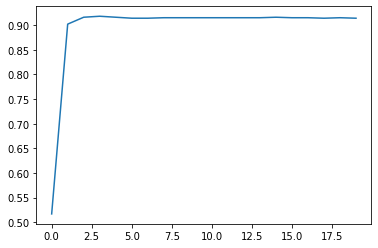

In [55]:
# 设置随机数种子
torch.manual_seed(420)  

# 初始化核心参数
num_epochs = 20
LR1 = logisticR()
cr1 = nn.BCEWithLogitsLoss()
op1 = optim.SGD(LR1.parameters(), lr = lr)

# 创建列表容器
train_acc = []

# 执行建模
for epochs in range(num_epochs):
    fit(net = LR1, 
        criterion = cr1, 
        optimizer = op1, 
        batchdata = batchData, 
        epochs = epochs)
    epoch_acc = acc_zhat(LR1(features), labels)
    train_acc.append(epoch_acc)

# 绘制图像查看准确率变化情况
plt.plot(list(range(num_epochs)), train_acc)

接下来，和此前一样，接下来尝试增加数据难度来测试模型分类性能

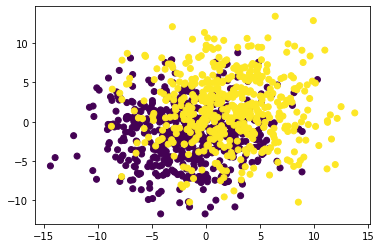

In [56]:
#————————————————————————————增加数据的分散程度————————————————————————————

#创建数据
torch.manual_seed(420)   

features, labels = tensorGenCla(num_class=2, deg_dispersion=[4, 4])                     
labels = labels.float()                           
data = TensorDataset(features, labels)            
batchData = DataLoader(data, batch_size = batch_size, shuffle = True)

plt.scatter(features[:, 0], features[:, 1], c = labels)

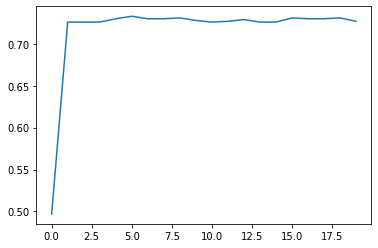

In [57]:
#创建数据
torch.manual_seed(420)   

# 数据封装与加载
data = TensorDataset(features, labels)            
batchData = DataLoader(data, batch_size = batch_size, shuffle = True)

# 初始化核心参数
num_epochs = 20
LR1 = logisticR()
cr1 = nn.BCEWithLogitsLoss()
op1 = optim.SGD(LR1.parameters(), lr = lr)

# 创建列表容器
train_acc = []

# 执行建模
for epochs in range(num_epochs):
    fit(net = LR1, 
        criterion = cr1, 
        optimizer = op1, 
        batchdata = batchData, 
        epochs = epochs)
    epoch_acc = acc_zhat(LR1(features), labels)
    train_acc.append(epoch_acc)

# 绘制图像查看准确率变化情况
plt.plot(list(range(num_epochs)), train_acc)

# 和此前一样，准确率在0.7-0.75之间徘徊。

【补充】实例化模型时参数的随机取值

在手动创建模型类之后，每次实例化都会随机生成一组参数值

In [58]:
class logisticR(nn.Module):
    def __init__(self, in_features=2, out_features=1):       # 定义模型的点线结构
        super(logisticR, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):                                    # 定义模型的正向传播规则
        out = self.linear(x)             
        return out

In [59]:
list(logisticR().parameters())

[Parameter containing:
 tensor([[-0.5718,  0.1682]], requires_grad=True),
 Parameter containing:
 tensor([-0.2149], requires_grad=True)]

In [60]:
list(logisticR().parameters())

[Parameter containing:
 tensor([[ 0.2635, -0.2820]], requires_grad=True),
 Parameter containing:
 tensor([-0.4625], requires_grad=True)]

若需要完全复现模型训练过程，则需要在实例化之前设置随机数种子，或者在上一个随机数种子之前规定有限次的随机次数。

- torch.manual_seed不会对random中的随机过程造成影响

In [61]:
l = list(range(5))
l
random.shuffle(l)
l

[0, 1, 2, 3, 4]

[0, 3, 1, 4, 2]

In [62]:
torch.manual_seed(420)  
l = list(range(5))
l
random.shuffle(l)
l

# 不影响shuffle

[0, 1, 2, 3, 4]

[4, 2, 3, 1, 0]

In [63]:
torch.manual_seed(420)  
l = list(range(5))
l
random.shuffle(l)
l

[0, 1, 2, 3, 4]

[4, 3, 0, 1, 2]

- random中可以通过设置random.seed来控制随机过程

In [64]:
random.seed(420)  
l = list(range(5))
l
random.shuffle(l)
l

[0, 1, 2, 3, 4]

[4, 3, 1, 2, 0]

In [65]:
random.seed(420)  
l = list(range(5))
l
random.shuffle(l)
l

[0, 1, 2, 3, 4]

[4, 3, 1, 2, 0]